In [1]:
import pandas as pd
import numpy as np

from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ds_program_data - Sheet1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   batch           54 non-null     int64  
 1   phase           54 non-null     int64  
 2   type            54 non-null     object 
 3   passing_rate    54 non-null     int64  
 4   avg_buddy       47 non-null     float64
 5   avg_materials   47 non-null     float64
 6   avg_instructor  47 non-null     float64
 7   buddy_ratio     45 non-null     float64
 8   total_student   45 non-null     float64
 9   passed          45 non-null     float64
 10  failed          45 non-null     float64
 11  participant     0 non-null      float64
 12  graduates       0 non-null      float64
 13  honors          0 non-null      float64
 14  ta              0 non-null      float64
 15  withdraw        45 non-null     float64
 16  withdraw_notes  0 non-null      float64
dtypes: float64(13), int64(3), object(1)
m

In [22]:
df[['avg_buddy', 'avg_materials', 'avg_instructor']] = df[['avg_buddy', 'avg_materials', 'avg_instructor']].fillna(df.mean())

In [24]:
df_full = df.copy()

In [5]:
df_full.describe()

batch      phase  passing_rate  avg_buddy  avg_materials  \
count  54.000000  54.000000     54.000000  54.000000      54.000000   
mean    7.722222   1.000000     87.203704   8.832766       4.085745   
std     4.919797   0.824163     13.279832   0.662815       0.222081   
min     1.000000   0.000000     50.000000   5.620000       3.640000   
25%     3.000000   0.000000     78.250000   8.725000       4.000000   
50%     7.500000   1.000000     89.000000   8.905000       4.085745   
75%    12.000000   2.000000    100.000000   9.212500       4.242500   
max    16.000000   2.000000    100.000000   9.630000       4.730000   

       avg_instructor  buddy_ratio  total_student     passed     failed  \
count       54.000000    54.000000      54.000000  54.000000  54.000000   
mean         4.456383     8.022222      16.244444  13.466667   2.177778   
std          0.207141     3.344886       6.097186   5.037969   1.945376   
min          4.000000     3.000000       5.000000   4.000000   0.000000   
25%          4.382500     6.000000      12.000000   9.250000   0.000000   
50%          4.456383     8.000000      16.244444  13.466667   2.177778   
75%          4.577500     9.000000      19.750000  16.000000   3.000000   
max          4.940000    22.000000      31.000000  25.000000   7.000000   

       participant  graduates  honors   ta   withdraw  withdraw_notes  
count          0.0        0.0     0.0  0.0  54.000000             0.0  
mean           NaN        NaN     NaN  NaN   0.511111             NaN  
std            NaN        NaN     NaN  NaN   0.944142             NaN  
min            NaN        NaN     NaN  NaN   0.000000             NaN  
25%            NaN        NaN     NaN  NaN   0.000000             NaN  
50%            NaN        NaN     NaN  NaN   0.000000             NaN  
75%            NaN        NaN     NaN  NaN   0.511111             NaN  
max            NaN        NaN     NaN  NaN   4.000000             NaN

In [6]:
profile = ProfileReport(df_full, title="Pandas Profiling Report", missing_diagrams={"bar": False, "matrix": False}, dark_mode=True)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.79s/it]


In [7]:
df_full.groupby(['type', 'phase'])['passing_rate', 'avg_buddy', 'avg_materials', 'avg_instructor'].mean()

<ipython-input-7-d500eecedbdd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_full.groupby(['type', 'phase'])['passing_rate', 'avg_buddy', 'avg_materials', 'avg_instructor'].mean()


passing_rate  avg_buddy  avg_materials  avg_instructor
type phase                                                        
HCK  0            87.500   9.131383       4.042872        4.303191
     1           100.000   8.966383       3.917872        4.458191
     2           100.000   8.832766       4.085745        4.456383
RMT  0            74.000   8.712673       4.057859        4.394149
     1            86.125   8.674721       4.009468        4.415798
     2            98.250   9.056875       4.216250        4.578125

In [8]:
df_full.corr()

batch     phase  passing_rate  avg_buddy  avg_materials  \
batch           1.000000  0.000000      0.071925  -0.104190      -0.014984   
phase           0.000000  1.000000      0.711981   0.169590       0.270086   
passing_rate    0.071925  0.711981      1.000000   0.123091       0.212673   
avg_buddy      -0.104190  0.169590      0.123091   1.000000       0.449138   
avg_materials  -0.014984  0.270086      0.212673   0.449138       1.000000   
avg_instructor -0.220295  0.359194      0.115380   0.465029       0.452761   
buddy_ratio     0.058474  0.260084      0.300810   0.225490       0.197862   
total_student   0.105671 -0.379230     -0.126077   0.243860       0.004164   
passed          0.127127 -0.127237      0.155880   0.273574       0.053037   
failed         -0.124198 -0.717856     -0.718351  -0.014982      -0.239668   
participant          NaN       NaN           NaN        NaN            NaN   
graduates            NaN       NaN           NaN        NaN            NaN   
honors               NaN       NaN           NaN        NaN            NaN   
ta                   NaN       NaN           NaN        NaN            NaN   
withdraw        0.308712 -0.387966     -0.251177   0.087891       0.036822   
withdraw_notes       NaN       NaN           NaN        NaN            NaN   

                avg_instructor  buddy_ratio  total_student    passed  \
batch                -0.220295     0.058474       0.105671  0.127127   
phase                 0.359194     0.260084      -0.379230 -0.127237   
passing_rate          0.115380     0.300810      -0.126077  0.155880   
avg_buddy             0.465029     0.225490       0.243860  0.273574   
avg_materials         0.452761     0.197862       0.004164  0.053037   
avg_instructor        1.000000     0.294046      -0.030908  0.021941   
buddy_ratio           0.294046     1.000000       0.234763  0.367847   
total_student        -0.030908     0.234763       1.000000  0.934179   
passed                0.021941     0.367847       0.934179  1.000000   
failed               -0.117381    -0.168693       0.572727  0.287361   
participant                NaN          NaN            NaN       NaN   
graduates                  NaN          NaN            NaN       NaN   
honors                     NaN          NaN            NaN       NaN   
ta                         NaN          NaN            NaN       NaN   
withdraw             -0.209591    -0.146443       0.361775  0.183527   
withdraw_notes             NaN          NaN            NaN       NaN   

                  failed  participant  graduates  honors  ta  withdraw  \
batch          -0.124198          NaN        NaN     NaN NaN  0.308712   
phase          -0.717856          NaN        NaN     NaN NaN -0.387966   
passing_rate   -0.718351          NaN        NaN     NaN NaN -0.251177   
avg_buddy      -0.014982          NaN        NaN     NaN NaN  0.087891   
avg_materials  -0.239668          NaN        NaN     NaN NaN  0.036822   
avg_instructor -0.117381          NaN        NaN     NaN NaN -0.209591   
buddy_ratio    -0.168693          NaN        NaN     NaN NaN -0.146443   
total_student   0.572727          NaN        NaN     NaN NaN  0.361775   
passed          0.287361          NaN        NaN     NaN NaN  0.183527   
failed          1.000000          NaN        NaN     NaN NaN  0.194268   
participant          NaN          NaN        NaN     NaN NaN       NaN   
graduates            NaN          NaN        NaN     NaN NaN       NaN   
honors               NaN          NaN        NaN     NaN NaN       NaN   
ta                   NaN          NaN        NaN     NaN NaN       NaN   
withdraw        0.194268          NaN        NaN     NaN NaN  1.000000   
withdraw_notes       NaN          NaN        NaN     NaN NaN       NaN   

                withdraw_notes  
batch                      NaN  
phase                      NaN  
passing_rate               NaN  
avg_buddy                  NaN  
avg_materials              NaN  
avg_instru

In [9]:
df_rmt = df_full[df_full.type=='RMT']
df_hck = df_full[df_full.type=='HCK']

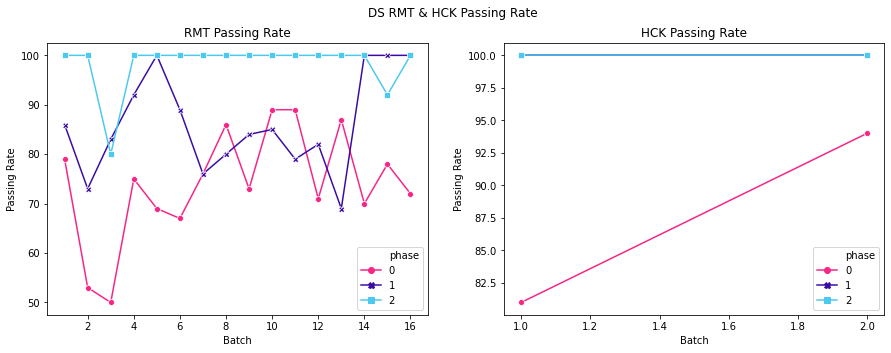

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('DS RMT & HCK Passing Rate')

rmt_plot = sns.lineplot(ax=axes[0],
    y='passing_rate', x='batch',
    hue='phase', style='phase', palette=['#F72585', '#3A0CA3', '#4CC9F0'], markers=True, dashes=False, data=df_rmt)
axes[0].set_title('RMT Passing Rate')
axes[0].set_ylabel('Passing Rate')
axes[0].set_xlabel('Batch')

hck_plot = sns.lineplot(ax=axes[1],
    y='passing_rate', x='batch',
    hue='phase', style='phase', palette=['#F72585', '#3A0CA3', '#4CC9F0'], markers=True, dashes=False, data=df_hck)
axes[1].set_title('HCK Passing Rate')
axes[1].set_ylabel('Passing Rate')
axes[1].set_xlabel('Batch')

plt.show()


In [11]:
df_hck['passing_rate'].mean()

95.83333333333333

In [12]:
import plotly.express as px

fig = px.line(df_rmt, y='passing_rate', x='batch', color='phase', markers=True, symbol='phase', title='RMT')
fig.update_layout(yaxis_range=[0,100])
fig.show()

In [13]:
df_full.batch.max()

16

In [14]:
df_full[
    (df_full.batch == df_full.batch.max()) &
    (df_full.phase == 0) &
    (df_full.type == 'RMT')
]['passing_rate']

45    72
Name: passing_rate, dtype: int64

In [15]:
df_full[
    (df_full.batch == df_full.batch.max()-1) &
    (df_full.phase == 0) &
    (df_full.type == 'RMT')
]['passing_rate']

42    78
Name: passing_rate, dtype: int64

In [16]:
df_full[
    (df_full.batch == df_hck.batch.max()) &
    (df_full.phase == 0) &
    (df_full.type == 'HCK')
]['passing_rate']

51    94
Name: passing_rate, dtype: int64

In [17]:
df_full[
    (df_full.batch == df_hck.batch.max()-1) &
    (df_full.phase == 0) &
    (df_full.type == 'HCK')
]['passing_rate']

48    81
Name: passing_rate, dtype: int64

In [18]:
def load_clean():
    df = pd.read_csv('ds_program_data - Sheet1.csv')

    df_full = df.fillna(df.mean(numeric_only=True))
    df_rmt = df_full[df_full.type=='RMT']
    df_hck = df_full[df_full.type=='HCK']

    return df_full, df_rmt, df_hck

In [19]:
df_full, df_rmt, df_hck = load_clean()

In [27]:
df_full.head(3)

batch  phase type  passing_rate  avg_buddy  avg_materials  avg_instructor  \
0      1      0  RMT            79       8.95           4.25            4.38   
1      1      1  RMT            86       8.90           4.00            4.21   
2      1      2  RMT           100       9.05           4.20            4.58   

   buddy_ratio  total_student  passed  failed  participant  graduates  honors  \
0          7.0           28.0    22.0     6.0          NaN        NaN     NaN   
1          6.0           22.0    19.0     3.0          NaN        NaN     NaN   
2          6.0           19.0    19.0     0.0          NaN        NaN     NaN   

   ta  withdraw  withdraw_notes  
0 NaN       0.0             NaN  
1 NaN       0.0             NaN  
2 NaN       0.0             NaN

In [29]:
df_full[df_full['phase'] == 0]['total_student'].sum()

298.0

In [28]:
df_full[df_full['phase'] == 2]['passed'].sum()

190.0

In [32]:
df_full[(df_full['phase'] == 0) & (df_full.batch < df_full.batch.max()-1)]['total_student'].sum()

280.0

In [33]:
df_full[(df_full['phase'] == 2) & (df_full.batch < df_full.batch.max()-1)]['passed'].sum()

178.0

In [34]:
df_hck['batch'].max()

2